In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Load the data
airbnb_df = pd.read_csv("../data/transformed/airbnb_listings.csv")
airbnb_df.head(5)

,host_identity_verified,instant_bookable,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,...,last_review_dayofweek,availability_ratio,price_per_min_stay,property_age,has_house_rules,has_license,total_cost,popularity_score,price_relative_to_neighbourhood,avg_reviews_per_listing
0,0,0,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,...,1.0,0.783562,96.600000,5.0,1,0,1159.0,36.0,1.543131,1.285714
1,1,0,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,...,5.0,0.624658,4.733333,18.0,1,0,170.0,180.0,0.232787,15.000000
2,0,1,2005.0,620.0,124.0,3.0,0.0,NaN,0.00,5.0,...,-1.0,0.964384,206.666667,20.0,1,0,744.0,0.0,0.998390,0.000000
3,0,1,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,...,4.0,0.882192,12.266667,20.0,0,0,442.0,1080.0,0.587859,135.000000
4,1,0,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,...,0.0,0.791781,20.400000,16.0,1,0,245.0,27.0,0.329032,4.500000


In [2]:
airbnb_df.columns

Index(['host_identity_verified', 'instant_bookable', 'construction_year',
       'price', 'service_fee', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'name_length',
       'policy_flexible', 'policy_moderate', 'policy_strict',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room',
       'neighbourhood_group_bronx', 'neighbourhood_group_brooklyn',
       'neighbourhood_group_manhattan', 'neighbourhood_group_queens',
       'neighbourhood_group_staten island', 'neighbourhood_group_williamsburg',
       'neigh_encoded', 'location_cluster', 'days_since_last_review',
       'last_review_year', 'last_review_month', 'last_review_dayofweek',
       'availability_ratio', 'price_per_min_stay', 'property_age',
       'has_house_rules', 'has_license', 'total_cost', 'popularity_score',
       'price_relative_to_neighbourhood', 'avg_reviews_per_listing'],
      dty

# Lets implement a price prediction model

In [3]:
X_columns = ['host_identity_verified', 'instant_bookable',
'service_fee', 'minimum_nights', 'number_of_reviews',
'reviews_per_month', 'review_rate_number',
'calculated_host_listings_count', 'availability_365',
'policy_flexible', 'policy_moderate', 'policy_strict',
'Entire home/apt', 'Hotel room', 'Private room', 'Shared room',
'neighbourhood_group_bronx', 'neighbourhood_group_brooklyn',
'neighbourhood_group_manhattan', 'neighbourhood_group_queens',
'neighbourhood_group_staten island', 'neighbourhood_group_williamsburg',
'location_cluster', 'days_since_last_review',
'availability_ratio', 'property_age',
'has_house_rules', 'has_license', 'popularity_score', 'avg_reviews_per_listing'
]

X = airbnb_df[X_columns]
y = airbnb_df["price"]

In [4]:
X.head(5)

,host_identity_verified,instant_bookable,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,policy_flexible,...,neighbourhood_group_staten island,neighbourhood_group_williamsburg,location_cluster,days_since_last_review,availability_ratio,property_age,has_house_rules,has_license,popularity_score,avg_reviews_per_listing
0,0,0,193.0,10.0,9.0,0.21,4.0,6.0,286.0,0,...,0,0,9,1388.0,0.783562,5.0,1,0,36.0,1.285714
1,1,0,28.0,30.0,45.0,0.38,4.0,2.0,228.0,0,...,0,0,0,1174.0,0.624658,18.0,1,0,180.0,15.000000
2,0,1,124.0,3.0,0.0,0.00,5.0,1.0,352.0,1,...,0,0,7,-1.0,0.964384,20.0,1,0,0.0,0.000000
3,0,1,74.0,30.0,270.0,4.64,4.0,1.0,322.0,0,...,0,0,1,2225.0,0.882192,20.0,0,0,1080.0,135.000000
4,1,0,41.0,10.0,9.0,0.10,3.0,1.0,289.0,0,...,0,0,8,2453.0,0.791781,16.0,1,0,27.0,4.500000


In [5]:
y[:5]

0    966.0
1    142.0
2    620.0
3    368.0
4    204.0
Name: price, dtype: float64

In [6]:
# Step 1: Split into train + temp (temp will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [7]:
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (71440, 30)
Validation size: (15309, 30)
Test size: (15309, 30)


In [8]:
# 2. Scale based on train only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [9]:
# 3. PCA based on train only
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [10]:
print(f"Components: {pca.n_components_}\n")
print(f"PCA Shape: {X_train_pca.shape}\n")
print(f"PCA Shape: {X_val_pca.shape}\n")
print(f"PCA Shape: {X_test_pca.shape}\n")

Components: 21

PCA Shape: (71440, 21)

PCA Shape: (15309, 21)

PCA Shape: (15309, 21)



In [11]:
def plot_pca_variance(pca):
    plt.figure(figsize = (7, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.title("PCA Explained Variance Ratio")
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.grid(True)
    plt.show()

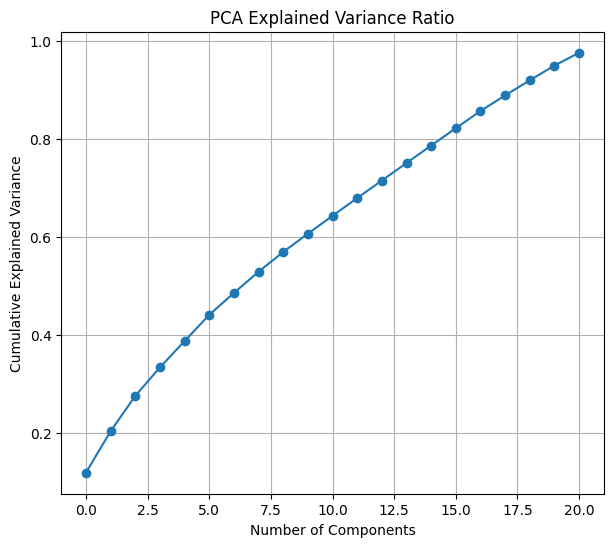

In [12]:
plot_pca_variance(pca)

(71440,)
(71440,)


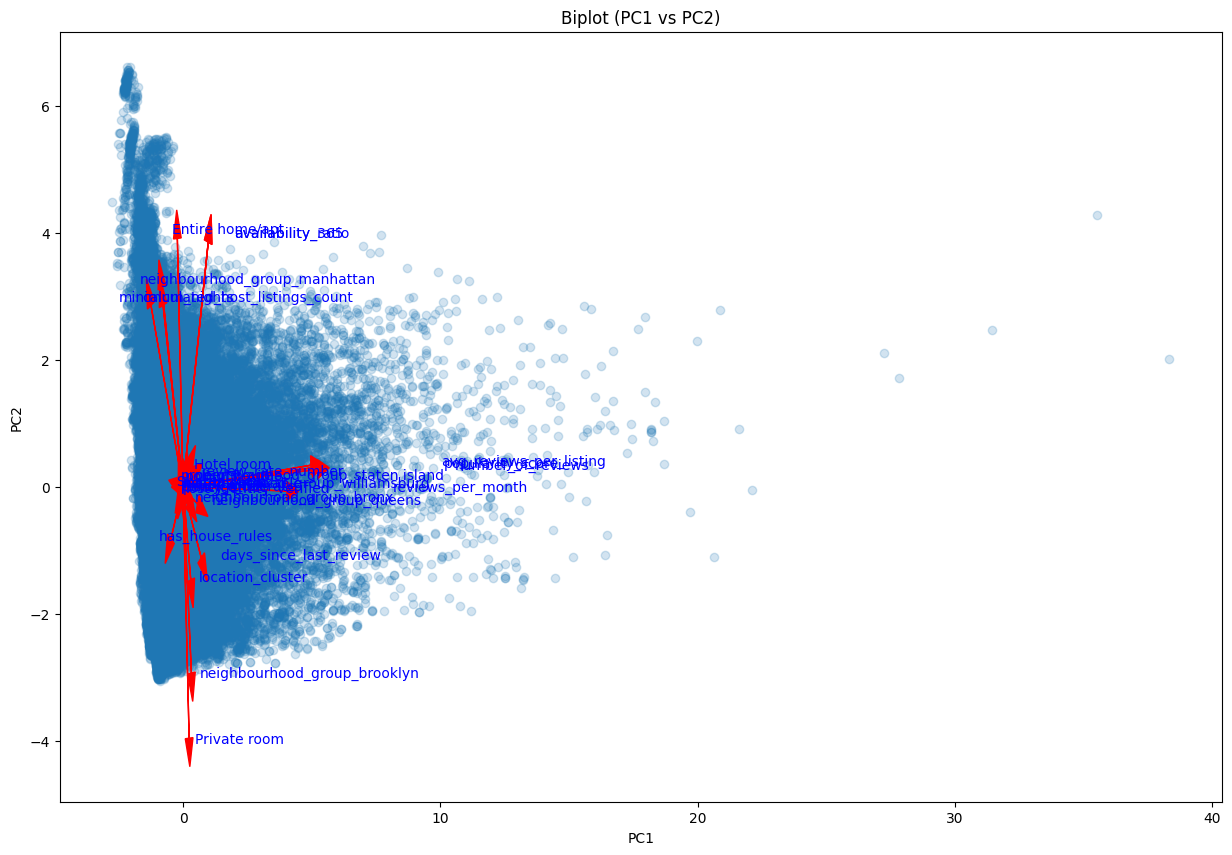

In [13]:
def biplot(score, coeff, feature_names):
    xs = score[:, 0]
    ys = score[:, 1]
    print(xs.shape)
    print(ys.shape)
    n = coeff.shape[0]
    
    plt.figure(figsize=(15,10))
    plt.scatter(xs, ys, alpha = 0.2)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0] * 10, coeff[i,1] * 10, color='r', head_width = 0.3)
        plt.text(coeff[i,0] * 20.2, coeff[i,1] * 10.2, feature_names[i], color='b', fontsize = 10)
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Biplot (PC1 vs PC2)')
    plt.grid(False)
    plt.show()

# Usage:
biplot(X_train_pca, pca.components_.T, X.columns)


In [14]:
# loadings = pd.DataFrame(pca.components_.T,
#                         columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
#                         index = X.columns)
# print("\nFeature loadings (coefficients) for each principal component:")
# print(loadings)

In [15]:
# Construct different models for training and finding which one performs best

In [16]:
models = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],  
            'min_samples_leaf': [1, 2]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
        "param_grid": {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.05, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    "Neural Network": {
        'model': MLPRegressor(max_iter=1000, random_state=42),
        'param_grid': {
            'hidden_layer_sizes': [(50,), (100,)],
            'activation': ['relu'],
            'learning_rate_init': [0.001, 0.01],
            'early_stopping': [True]
        }
    }
}


Training Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation R² for Random Forest: 98.98%
Train R² for Random Forest: 99.77%
Validation R² for Random Forest: 98.94%
Test R² for Random Forest: 98.99%

Training XGBoost...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-validation R² for XGBoost: 99.15%
Train R² for XGBoost: 99.44%
Validation R² for XGBoost: 99.02%
Test R² for XGBoost: 99.07%

Training Neural Network...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Neural Network: {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
Best Cross-validation R² for Neural Network: 99.57%
Train R² for Neural Network: 99.60%
Validation R² for Neural Network: 99.42%
Test R² for Neural Network: 99.44%


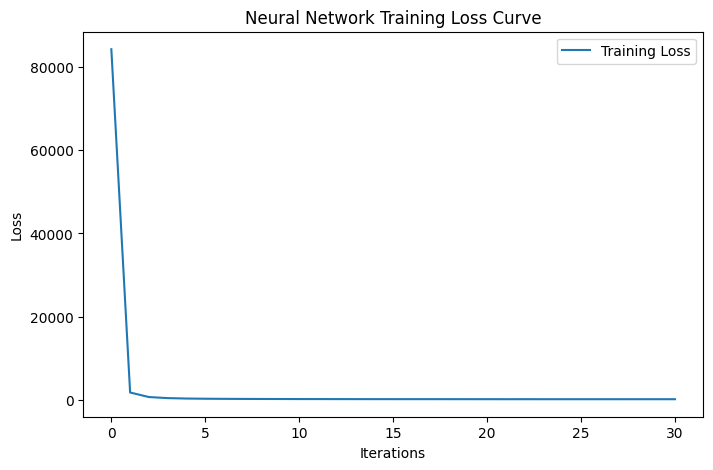


Retraining XGBoost for loss curves...


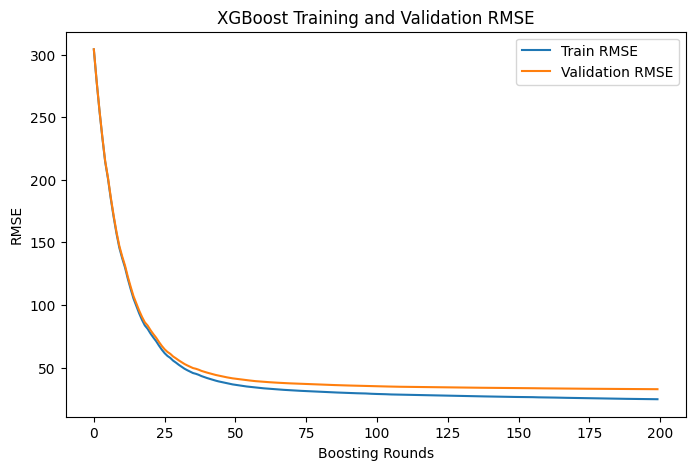

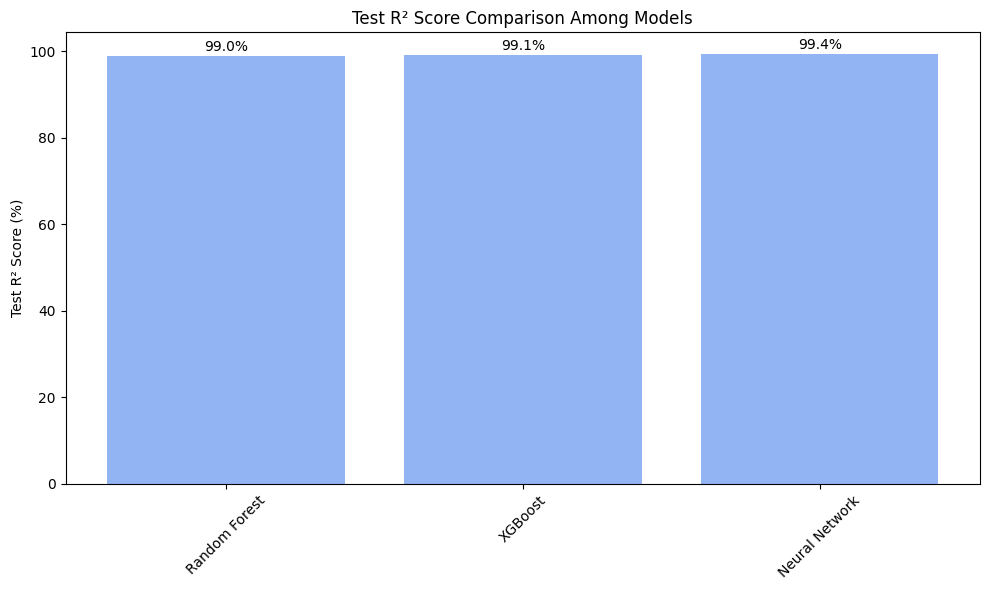

In [17]:
best_models = {}
model_r2_scores = []
model_names = []
cv = KFold(n_splits=3, shuffle=True, random_state=42)

for name, config in models.items():
    print(f"\nTraining {name}...")
    
    grid_search = GridSearchCV(
        config["model"],
        config["param_grid"],
        cv=cv,
        scoring="r2",
        n_jobs=-1,
        verbose=1
    )
    
    # FIXED: Use PCA-transformed data for training
    grid_search.fit(X_train_pca, y_train)
    best_models[name] = grid_search.best_estimator_
    
    # FIXED: Use PCA-transformed data for predictions
    y_train_pred = best_models[name].predict(X_train_pca)
    y_val_pred = best_models[name].predict(X_val_pca)
    y_test_pred = best_models[name].predict(X_test_pca)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    model_names.append(name)
    model_r2_scores.append(test_r2 * 100)
    
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Cross-validation R² for {name}: {grid_search.best_score_ * 100:.2f}%")
    print(f"Train R² for {name}: {train_r2 * 100:.2f}%")
    print(f"Validation R² for {name}: {val_r2 * 100:.2f}%")
    print(f"Test R² for {name}: {test_r2 * 100:.2f}%")

# ======= Plotting Training Loss Curves if available =======

# Neural Network training loss curve
if 'Neural Network' in best_models:
    nn_model = best_models['Neural Network']
    if hasattr(nn_model, 'loss_curve_'):
        plt.figure(figsize=(8, 5))
        plt.plot(nn_model.loss_curve_, label='Training Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Neural Network Training Loss Curve')
        plt.legend()
        plt.show()

# XGBoost training and validation error
if 'XGBoost' in best_models:
    print("\nRetraining XGBoost for loss curves...")
    xgb_model = best_models['XGBoost']
    # FIXED: Use PCA-transformed data and correct eval_set format
    xgb_model.fit(
        X_train_pca, y_train,
        eval_set=[(X_train_pca, y_train), (X_val_pca, y_val)],
        verbose=False
    )
    
    results = xgb_model.evals_result()
    plt.figure(figsize=(8, 5))
    plt.plot(results['validation_0']['rmse'], label='Train RMSE')
    plt.plot(results['validation_1']['rmse'], label='Validation RMSE')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('RMSE')
    plt.title('XGBoost Training and Validation RMSE')
    plt.legend()
    plt.show()

# ======= Bar chart comparing test R² scores =======
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(model_names))
bars = plt.bar(x_pos, model_r2_scores, alpha=0.7, color='cornflowerblue')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

plt.xticks(x_pos, model_names, rotation=45)
plt.ylabel('Test R² Score (%)')
plt.title('Test R² Score Comparison Among Models')
plt.tight_layout()
plt.show()